Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
[131.21986389160156, 78.02272033691406, 60.12052536010742, 58.45170593261719, 58.48456573486328, 58.467403411865234, 58.496578216552734, 58.435340881347656, 58.49098587036133, 58.431968688964844]


<IPython.core.display.Javascript object>


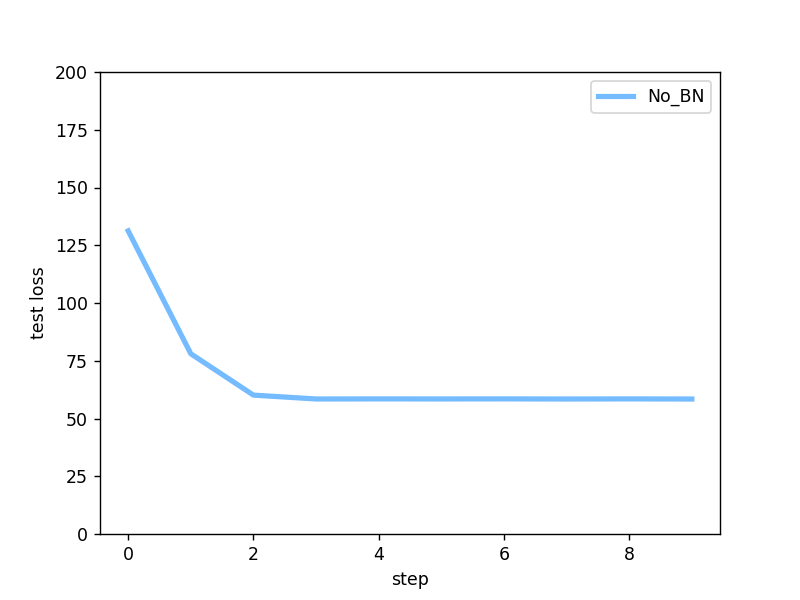

<IPython.core.display.Javascript object>


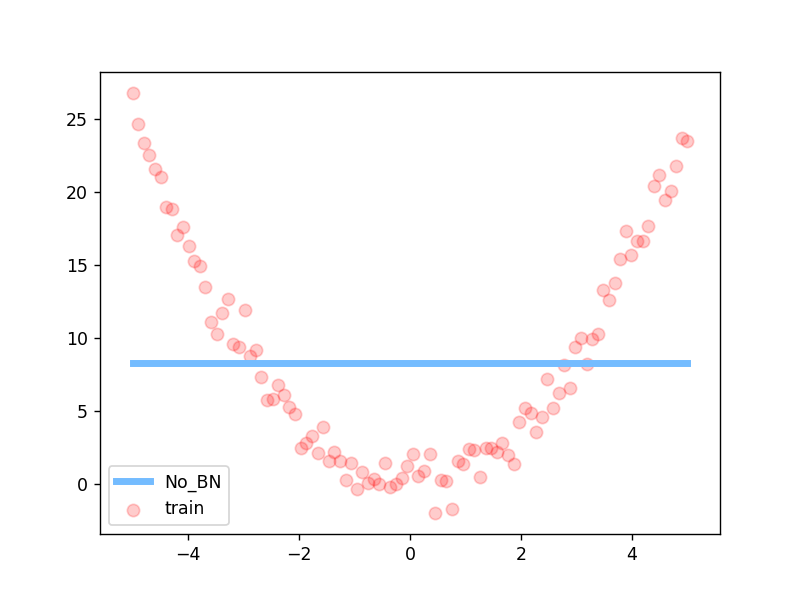

In [2]:
%matplotlib notebook
import torch
from torch import nn
from torch.nn import init
import torch.utils.data as Data
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.nn import init
import torch.utils.data as Data
import matplotlib.pyplot as plt
import numpy as np

#train data
x = np.linspace(-5, 5, 1000)[:, np.newaxis]
y = np.square(x) + np.random.normal(0, 1, x.shape)
train_x = torch.from_numpy(x).float()
train_y = torch.from_numpy(y).float()

# test data
test_x = np.linspace(-5, 5, 100)[:, np.newaxis]
test_y = np.square(test_x)  + np.random.normal(0, 1, test_x.shape)
test_x = torch.from_numpy(test_x).float()
test_y = torch.from_numpy(test_y).float()

train_dataset = Data.TensorDataset(train_x, train_y)
train_loader = Data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True, num_workers=2,)



class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.fc0=nn.Linear(1,10)
        self.fc1=nn.Linear(10,10)
        self.fc2=nn.Linear(10,10)
        self.fc3=nn.Linear(10,10)
        self.predict=nn.Linear(10,1)
    
    def forward(self,x):

        x = self.fc0(x)
        x = torch.tanh(x)
 
        x = self.fc1(x)
        x = torch.tanh(x)

        x = self.fc2(x)
        x = torch.tanh(x)

        x = self.fc3(x)
        x = torch.tanh(x)

        out=self.predict(x)
        return out


net=Net() 
opt=torch.optim.Adam(net.parameters(),lr=0.02)
loss_func=nn.MSELoss()
if __name__ == "__main__":
    l=[] 
    for epoch in range(10):
        print('Epoch: ', epoch)
        net.eval()              # set eval mode to fix moving_mean and moving_var
        pred= net(test_x)
        l.append(loss_func(pred, test_y).data.item())
        net.train()             # free moving_mean and moving_var
        for step, (b_x, b_y) in enumerate(train_loader):
            pred = net(b_x)
            loss = loss_func(pred, b_y)
            opt.zero_grad()
            loss.backward()
            opt.step()    # it will also learns the parameters in Batch Normalization
    print(l)
    plt.figure(1)
    
    plt.plot(l, c='#74BCFF', lw=3, label='No_BN')
    plt.xlabel('step');plt.ylabel('test loss');plt.ylim((0, 200));plt.legend(loc='best')


    net.eval() 
    preds = net(test_x)
    plt.figure(2)
    plt.plot(test_x.data.numpy(), preds.data.numpy(), c='#74BCFF', lw=4, label='No_BN')
    plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='r', s=50, alpha=0.2, label='train')
    plt.legend(loc='best')
    plt.show()